#IP PROJECT: PLANT DISEASE DETECTION USING CNN AND TRANSFER LEARNING

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

#Kaggle

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 75 bytes


In [0]:
!pip install kaggle

In [0]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d emmarex/plantdisease

 99% 652M/658M [00:12<00:00, 67.1MB/s]
100% 658M/658M [00:12<00:00, 53.6MB/s]


#Extracting Dataset

In [14]:
from zipfile import ZipFile
filename = "plantdisease.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [0]:
path = '/content/plantvillage/PlantVillage'

In [0]:
bs = 16

In [0]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
                                  ds_tfms=get_transforms(), size=224, 
                                  num_workers = 4, bs=bs).normalize(imagenet_stats)

## Viewing the data

In [18]:
data.c

15

In [19]:
data.classes

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [20]:
len(data.train_ds), len(data.valid_ds)

(16511, 4127)

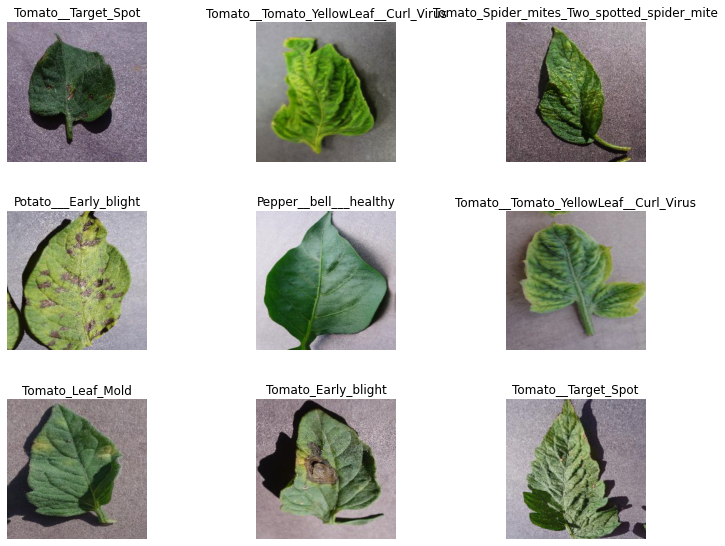

In [89]:
data.show_batch(rows = 3, figsize = (10,8))

#Self Designed CNN

##Importing libraries

In [0]:
%matplotlib inline
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

##Loading data

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
path = '/content/plantvillage/PlantVillage'
data_dir = path

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2)

In [25]:
train_data = datagen.flow_from_directory(path, target_size = (IMG_HEIGHT, IMG_WIDTH), 
                                         class_mode='categorical',batch_size=batch_size, 
                                         subset='training', shuffle=True)

valid_data = datagen.flow_from_directory(path, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                        class_mode='categorical', shuffle=True,
                                        batch_size= batch_size, subset='validation')

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


In [0]:
total_train = 16516
total_val = 4122
labels = (train_data.class_indices)

##Model Definition

In [0]:
CNN_Custom = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(15)
])

In [0]:
CNN_Custom.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
CNN_Custom.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

##Training

In [30]:
history = CNN_Custom.fit_generator(
    train_data,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=valid_data,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/15
129/129 [==============================] - 140s 1s/step - loss: 10.1429 - accuracy: 0.2946 - val_loss: 1.8484 - val_accuracy: 0.4241
Epoch 2/15
129/129 [==============================] - 142s 1s/step - loss: 1.7204 - accuracy: 0.4551 - val_loss: 1.6632 - val_accuracy: 0.4756
Epoch 3/15
129/129 [==============================] - 138s 1s/step - loss: 1.4407 - accuracy: 0.5448 - val_loss: 1.3074 - val_accuracy: 0.5801
Epoch 4/15
129/129 [==============================] - 138s 1s/step - loss: 1.2002 - accuracy: 0.6131 - val_loss: 1.0627 - val_accuracy: 0.6541
Epoch 5/15
129/129 [==============================] - 139s 1s/step - loss: 1.0970 - accuracy: 0.6422 - val_loss: 1.1808 - val_accuracy: 0.6199
Epoch 6/15
129/129 [==============================] - 139s 1s/step - loss: 1.0269 - accuracy: 0.6678 - val_loss: 0.9117 - val_accuracy: 0.6921
Epoch 7/15
129/129 [==============================] - 137s 1s/step - loss: 0.8612 - accuracy: 0.7178 - val_loss: 0.8167 - val_accuracy: 0.731

##Results

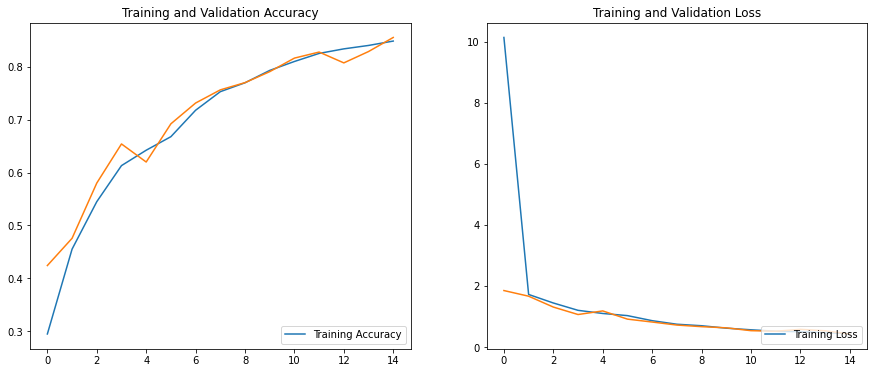

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(["Training Accuracy", "Validation Accuracy"], loc='lower right')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training and Validation Loss')
plt.legend(["Training Loss", "Validation Loss"], loc='lower right')
plt.plot(epochs_range, val_loss, label='Validation Loss')

##Testing

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [0]:
import cv2

In [0]:
test_img_path = '/content/Bell_Pepper_bacterial_spot_1.jpg'
img = cv2.imread(test_img_path)
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

prob = CNN_Custom.predict(img) 
pred_class = prob.argmax(axis=-1)

In [91]:
print(pred_class)

[1]


In [92]:
for key in labels:
  print(key, ": ", labels[key])

Pepper__bell___Bacterial_spot :  0
Pepper__bell___healthy :  1
Potato___Early_blight :  2
Potato___Late_blight :  3
Potato___healthy :  4
Tomato_Bacterial_spot :  5
Tomato_Early_blight :  6
Tomato_Late_blight :  7
Tomato_Leaf_Mold :  8
Tomato_Septoria_leaf_spot :  9
Tomato_Spider_mites_Two_spotted_spider_mite :  10
Tomato__Target_Spot :  11
Tomato__Tomato_YellowLeaf__Curl_Virus :  12
Tomato__Tomato_mosaic_virus :  13
Tomato_healthy :  14


#CNN Models (Transfer Learning)

##AlexNet

### Traning

In [51]:
alex = cnn_learner(data, models.alexnet, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [0]:
alex.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): AdaptiveAvgPool2d(output_size=(6, 6))
  )
  (1): Sequential(
    (0): AdaptiveConcatPool2d(
      (ap): AdaptiveAvgPool2d(output_

In [56]:
alex.fit_one_cycle(5) #batch size reduced to 16 to keep hyperparameters constant for comparison sake

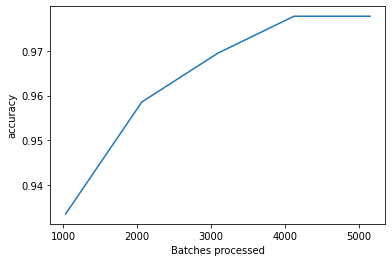

In [57]:
alex.recorder.plot_metrics()

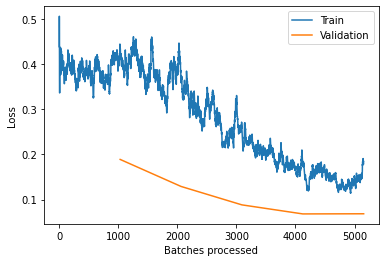

In [58]:
alex.recorder.plot_losses()

###Results interpretation

In [59]:
alex_interp = ClassificationInterpretation.from_learner(alex)

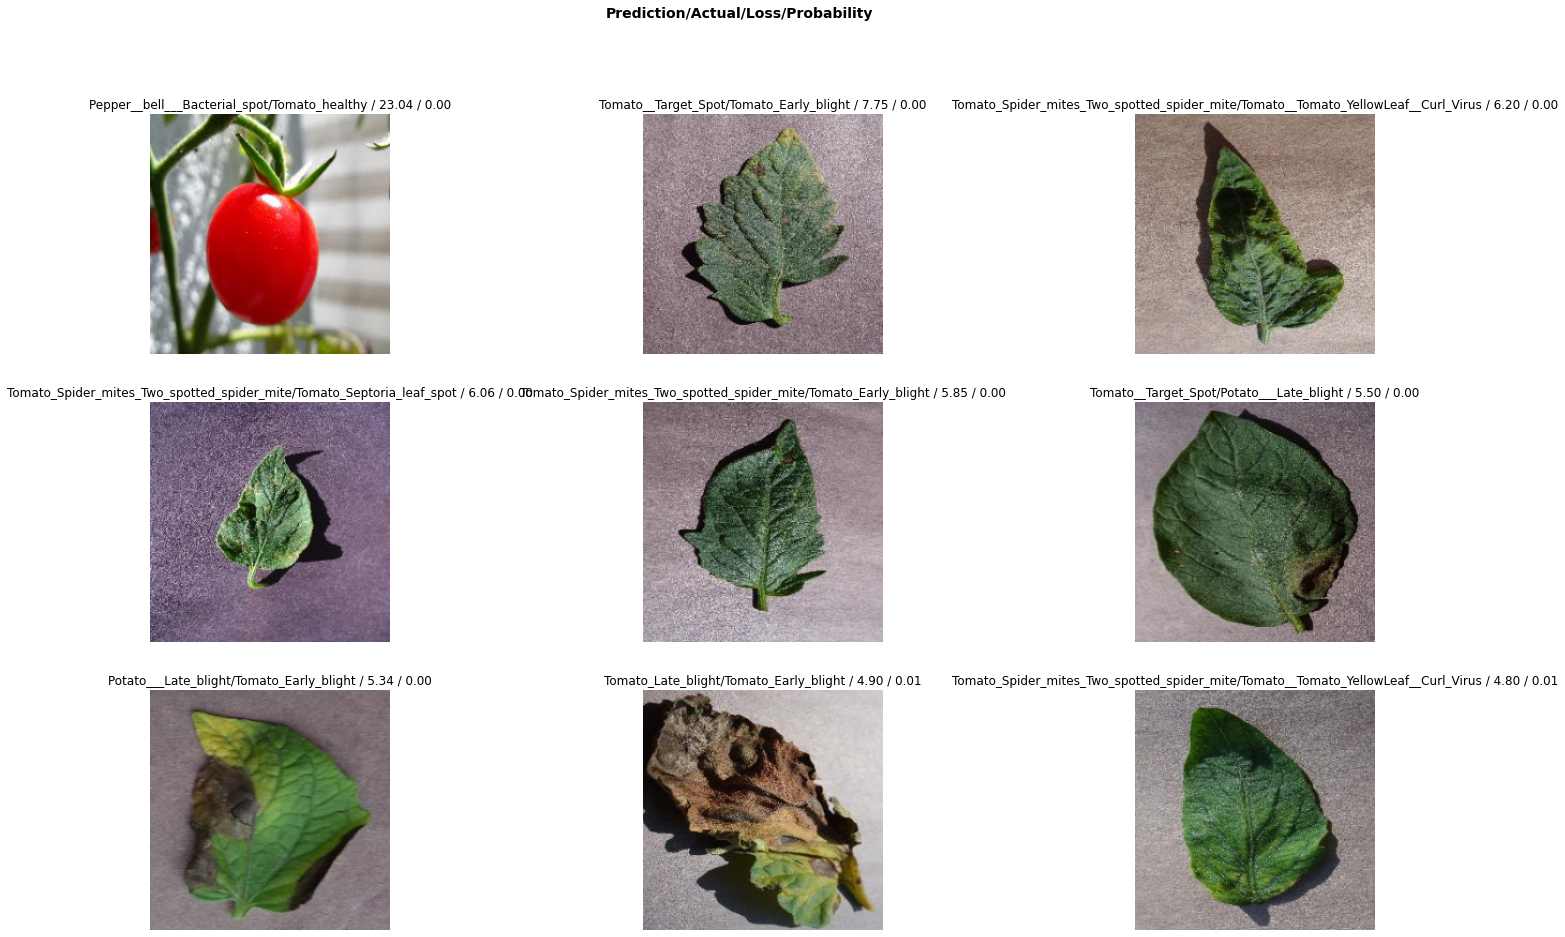

In [60]:
alex_interp.plot_top_losses(9, figsize = (25, 15))

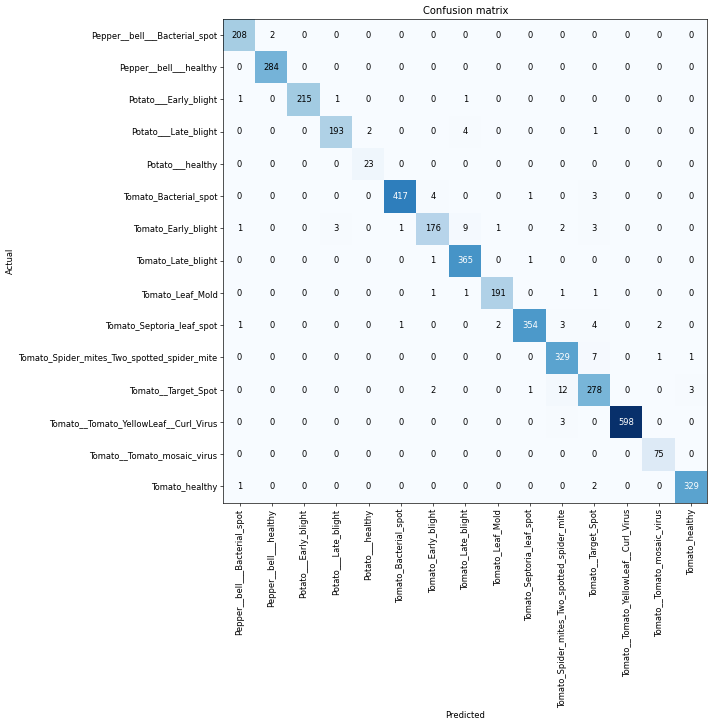

In [61]:
alex_interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

###Prediction

In [93]:
test_img_path = "/content/Potato_Early_Blight.jpg"
test_img = open_image(test_img_path)
pred_class,pred_idx,outputs= alex.predict(test_img)

print(pred_class)

Potato___Early_blight


##VGG

###Training

In [63]:
vgg = cnn_learner(data, models.vgg19_bn, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth


In [0]:
vgg.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU(inplace=True)
      (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU(inplace=True)
      (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilat

In [64]:
vgg.fit_one_cycle(5) #batch size reduced to 16 to accomodate within the CUDA limits

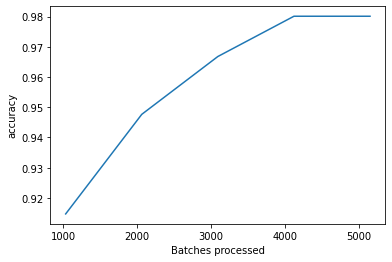

In [65]:
vgg.recorder.plot_metrics()

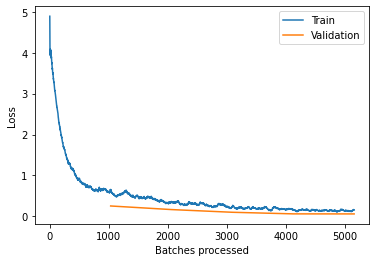

In [66]:
vgg.recorder.plot_losses()

###Result Interpretation

In [67]:
vgg_interp = ClassificationInterpretation.from_learner(vgg)

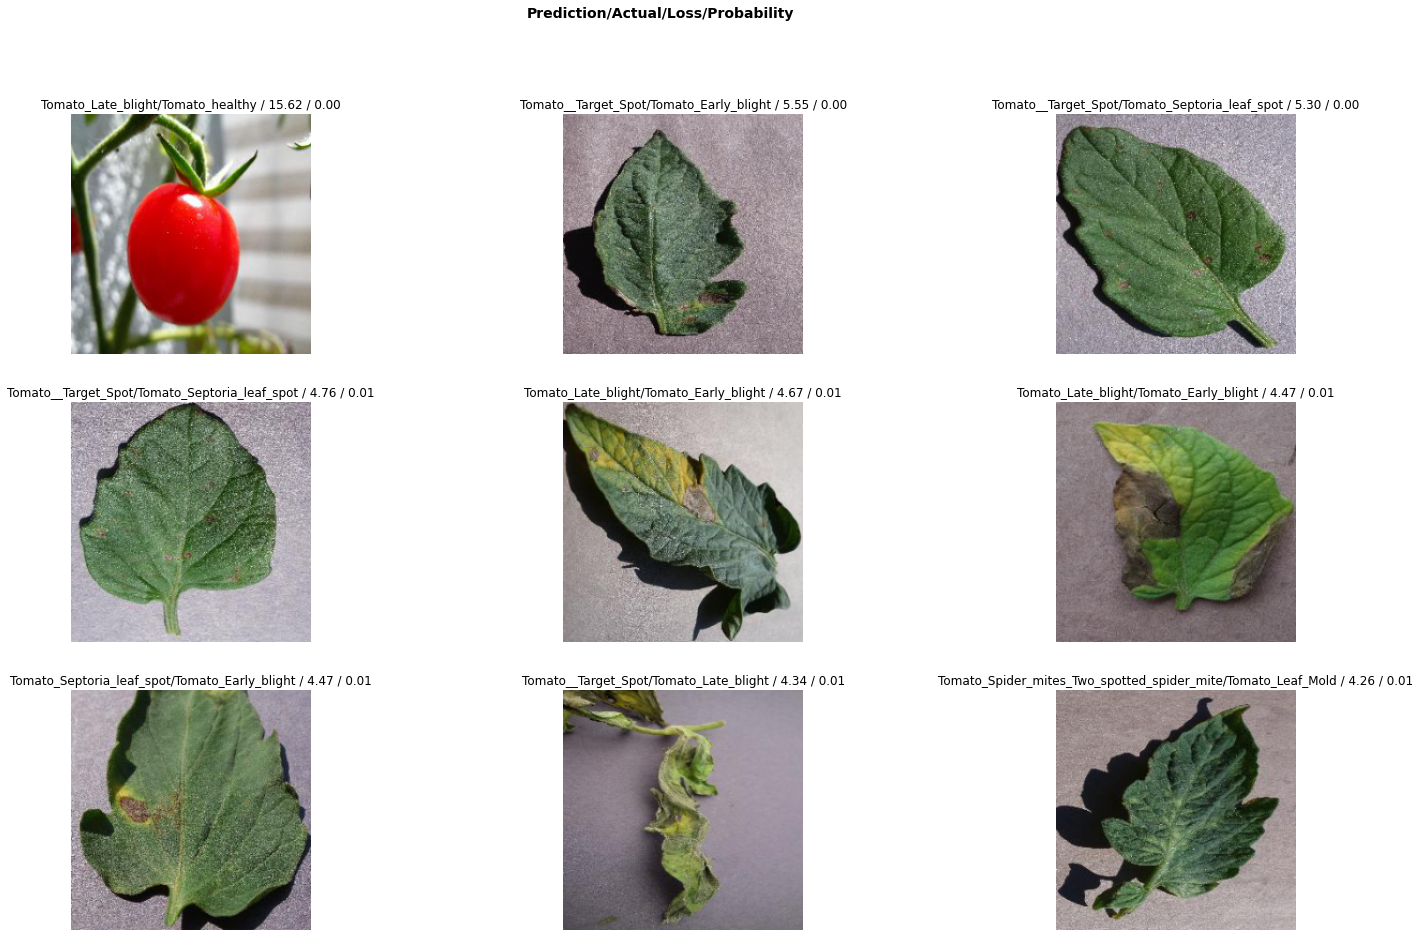

In [68]:
vgg_interp.plot_top_losses(9, figsize = (25, 15))

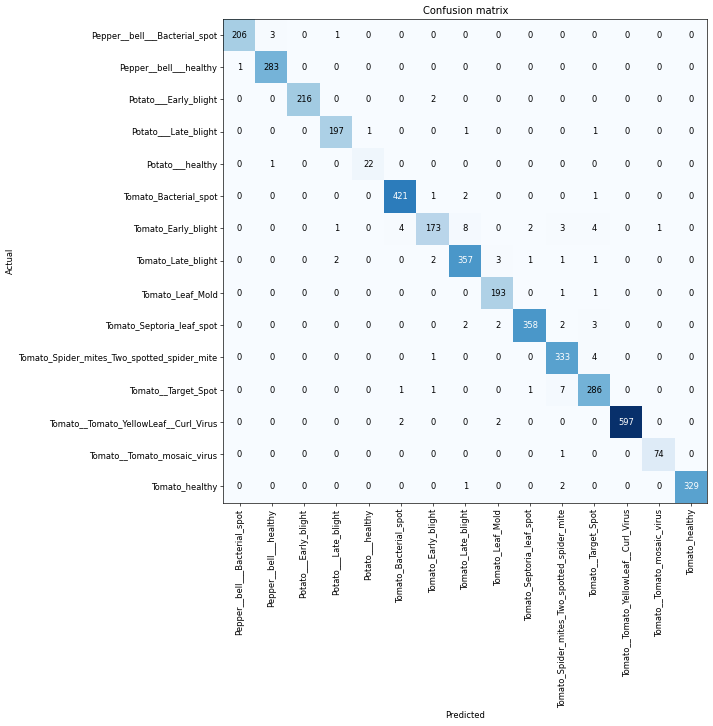

In [69]:
vgg_interp.plot_confusion_matrix(figsize = (12, 12), dpi=60)

###Prediction

In [94]:
test_img_path = "/content/Tomato_Leaf_Mold_2.jpg"
test_img = open_image(test_img_path)
pred_class,pred_idx,outputs= vgg.predict(test_img)

print(pred_class)

Tomato_Leaf_Mold


##Resnet34 

###Training

In [71]:
resnet = cnn_learner(data, models.resnet34, metrics = accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
resnet.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [72]:
resnet.fit_one_cycle(5) #batchsize reduced to 16 to keep hyperparameters constant for sake of comparison

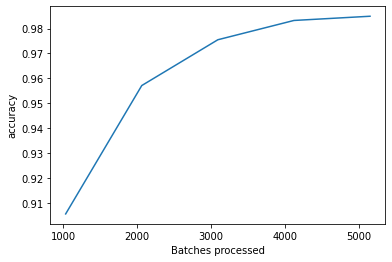

In [73]:
resnet.recorder.plot_metrics()

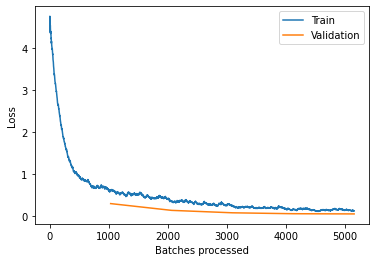

In [74]:
resnet.recorder.plot_losses()

###Result Interpretation

In [76]:
resnet_interp = ClassificationInterpretation.from_learner(resnet)

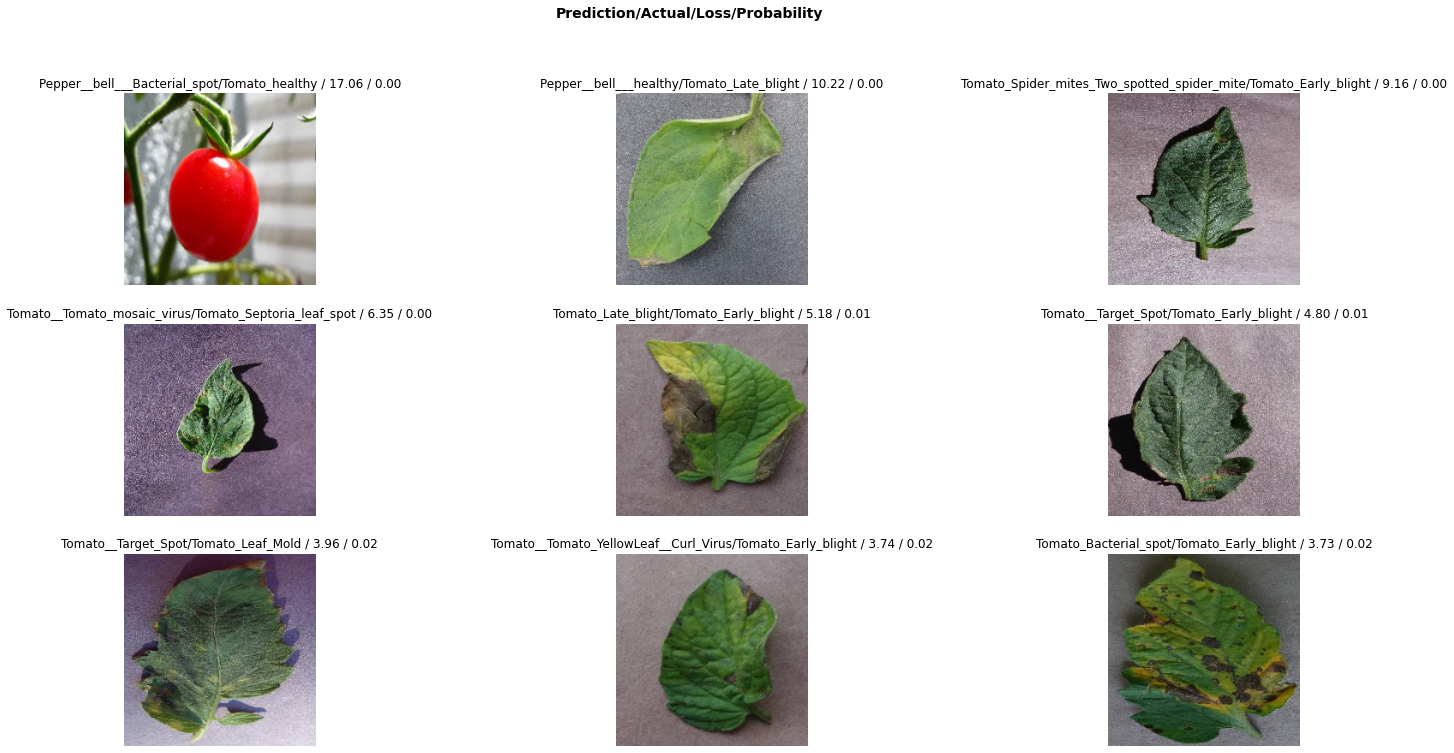

In [77]:
resnet_interp.plot_top_losses(9, figsize = (25, 12))

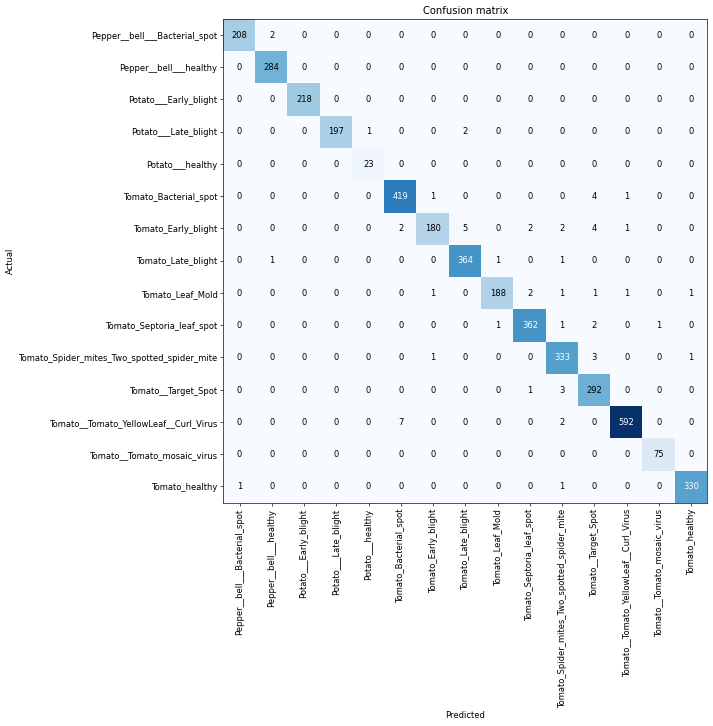

In [78]:
resnet_interp.plot_confusion_matrix(figsize = (12, 12), dpi=60)

###Prediction

In [95]:
test_img_path = "/content/Bell_Pepper_bacterial_spot_2.jpg"
test_img = open_image(test_img_path)
pred_class,pred_idx,outputs= resnet.predict(test_img)

print(pred_class)

Pepper__bell___Bacterial_spot
